# Libraries

In [1]:
import pandas
import matplotlib.pyplot as plt
pandas.set_option('max_rows', 20)
pandas.set_option('max_columns',150)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# Data Importing & Preprocessing

In [2]:
fileName = "[Fall 2019] SSS Final Combined Dataset.xlsx"
data = pandas.read_excel(fileName, sheet_name=1)

# only pick the columns we need & Rename for easier coding
data = data[['Overall CS','Overall EA','Overall FA','Overall MC', 'Q22_Coding', 'Q22_Writing', 'average', 'week 14']]
data = data.rename(columns={"Overall CS": "CS", "Overall EA": "EA", "Overall FA": "FA", "Overall MC": "MC",\
                  'Q22_Coding': 'Coding', 'Q22_Writing':'Writing'})

data.head(10)

,CS,EA,FA,MC,Coding,Writing,average,week 14
0,2.923399,2.716529,3.218801,3.051978,NaN,NaN,0.195,0.0
1,2.955067,3.059391,3.138871,2.836188,NaN,NaN,0.396,NaN
2,3.059550,3.377578,3.361276,3.114314,NaN,NaN,NaN,NaN
3,3.199458,3.203598,2.893647,2.921220,NaN,NaN,NaN,NaN
4,2.993896,3.030768,2.601742,2.681893,Coding (Thursdays),NaN,0.655,3.0
5,3.188818,3.171405,2.975271,3.415780,Coding (Thursdays),NaN,0.680,7.0
6,3.107787,2.752034,3.140305,2.840653,Coding (Thursdays),NaN,0.254,0.0
7,3.253505,3.212283,3.455572,3.434266,NaN,NaN,NaN,NaN
8,2.554597,2.745642,3.004592,3.224945,Coding (Thursdays),NaN,0.187,0.0
9,3.447369,3.383490,3.339910,3.309792,NaN,NaN,NaN,NaN


In [3]:
# Swap the Q22 data with 0 = not attending SSS and 1 = attending SSS for correlation purposes
coding = data['Coding'].astype(str) == "nan"
writing = data['Writing'].astype(str) == 'nan'
for i in range(len(data['FA'])):
    if coding[i]:
        data.loc[i,'Coding'] = 0
    else:
        data.loc[i,'Coding'] = 1
    if writing[i]:
        data.loc[i,'Writing'] = 0
    else:
        data.loc[i,'Writing'] = 1
        
data.head(10)

,CS,EA,FA,MC,Coding,Writing,average,week 14
0,2.923399,2.716529,3.218801,3.051978,0,0,0.195,0.0
1,2.955067,3.059391,3.138871,2.836188,0,0,0.396,NaN
2,3.059550,3.377578,3.361276,3.114314,0,0,NaN,NaN
3,3.199458,3.203598,2.893647,2.921220,0,0,NaN,NaN
4,2.993896,3.030768,2.601742,2.681893,1,0,0.655,3.0
5,3.188818,3.171405,2.975271,3.415780,1,0,0.680,7.0
6,3.107787,2.752034,3.140305,2.840653,1,0,0.254,0.0
7,3.253505,3.212283,3.455572,3.434266,0,0,NaN,NaN
8,2.554597,2.745642,3.004592,3.224945,1,0,0.187,0.0
9,3.447369,3.383490,3.339910,3.309792,0,0,NaN,NaN


# Histograms & Basic info


Count

CS         160
EA         160
FA         160
MC         160
Coding     160
Writing    160
dtype: int64

Mean

CS         3.032371
EA         3.076449
FA         3.087280
MC         3.049046
Coding     0.512500
Writing    0.112500
dtype: float64

SD

CS         0.284627
EA         0.273223
FA         0.308280
MC         0.290648
Coding     0.501413
Writing    0.316973
dtype: float64

Median

CS         3.035341
EA         3.087871
FA         3.108663
MC         3.040975
Coding     1.000000
Writing    0.000000
dtype: float64

Max

CS         3.928072
EA         3.705404
FA         3.839713
MC         3.831825
Coding     1.000000
Writing    1.000000
dtype: float64

Min

CS         2.182446
EA         2.140117
FA         2.093984
MC         2.298700
Coding     0.000000
Writing    0.000000
dtype: float64


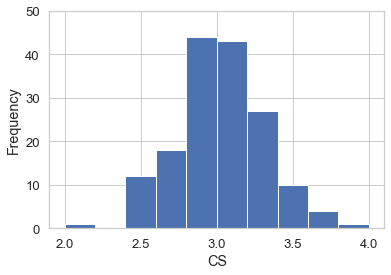

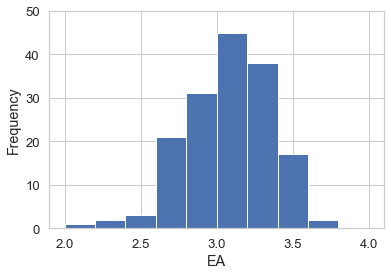

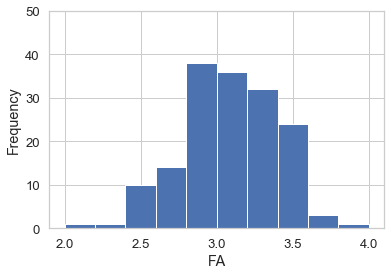

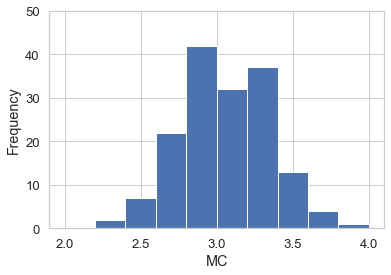

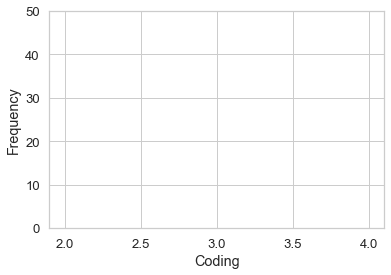

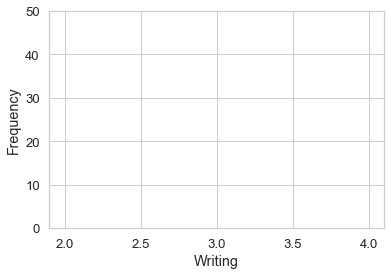

In [4]:
# show a histogram for each of the different columns
def printDescriptiveStats (dataframe): # prints the descriptive basic stats
    print('\nCount\n')
    print(dataframe.count()) 
    print('\nMean\n')
    print(dataframe.mean()) 
    print('\nSD\n')
    print(dataframe.std()) # note that Bessel's correction of n-1 is used by default
    print('\nMedian\n')
    print(dataframe.median())
    print('\nMax\n')
    print(dataframe.max())
    print('\nMin\n')
    print(dataframe.min())
    
    
printDescriptiveStats(data) 

for dataColumn in list(data):
    plt.hist(data[dataColumn], bins=10, range=[2,4])
    plt.xlabel(dataColumn)
    plt.ylabel('Frequency')
    plt.ylim(top=50)
    plt.show()

# Regression
For taking the SSS vs FA & MC Grades

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


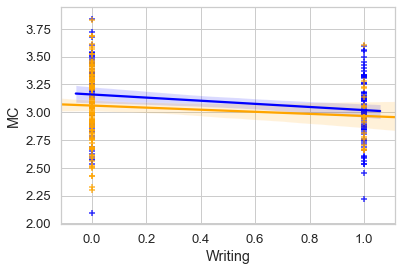

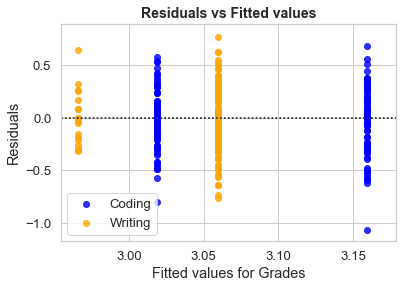

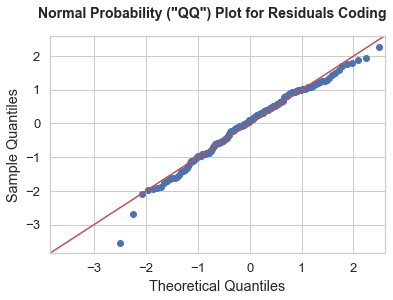

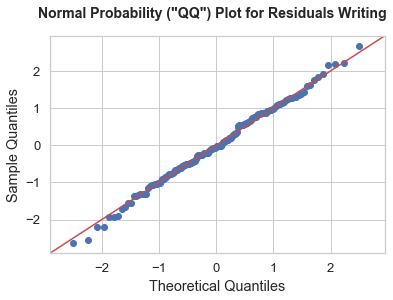

In [5]:
# Code edited from CS51 2.1 class cocalc, extra explanations added where needed
def regression_Double(column_x1, column_y1, column_x2, column_y2):
    global data, regressionmodel1, regressionmodel2
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''
    plt.figure()
    # This calculates a regression plot based on the equations we learned in class,
    # and probably some things we didn't learn on exactly how to easily calculate
    # this in python. Still explanation of this is outside of the scope of this paper
    sns.regplot(x=column_x1, y=column_y1, data=data, marker="+",fit_reg=True,color='blue')
    sns.regplot(x=column_x2, y=column_y2, data=data, marker="+",fit_reg=True,color='orange')    
    
    # We do the same thing above for two genders independently just to drawn the graph 9
    X1 = data[column_x1]
    X1 = statsmodels.add_constant(X1)
    Y1 = data[column_y1]
    regressionmodel1 = statsmodels.OLS(Y1,X1).fit() 
    X2 = data[column_x2]
    X2 = statsmodels.add_constant(X2)
    Y2 = data[column_y2]
    regressionmodel2 = statsmodels.OLS(Y2,X2).fit()

    
    # this section plots male and female graphs on top of each other for graph 9
    plt.figure()
    residualplot1 = sns.residplot(x=regressionmodel1.predict(), y=regressionmodel1.resid, color='blue', label='Coding')
    residualplot2 = sns.residplot(x=regressionmodel2.predict(), y=regressionmodel2.resid, color='orange',label='Writing')
    residualplot2.set(xlabel='Fitted values for Grades', ylabel='Residuals')
    residualplot2.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    residualplot2.legend()
    residualplot2.set_alpha(0.5)

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel1.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals Coding",fontweight='bold',fontsize=14)
    qqplot = statsmodels.qqplot(regressionmodel2.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals Writing",fontweight='bold',fontsize=14)
    
regression_Double('Coding', 'FA', 'Writing', 'MC')

In [6]:
regressionmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     8.693
Date:                Tue, 25 Feb 2020   Prob (F-statistic):            0.00368
Time:                        21:02:20   Log-Likelihood:                -33.964
No. Observations:                 160   AIC:                             71.93
Df Residuals:                     158   BIC:                             78.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1592      0.034     92.671      0.000       3.092       3.227
Coding        -0.1404      0.048     -2.948      0.004      -0.234      -0.046
==============================================================================
Omnibus:                        6.191   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.862
Skew:                          -0.457   Prob(JB):                       0.0533
Kurtosis:                       3.213   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
regressionmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MC   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.658
Date:                Tue, 25 Feb 2020   Prob (F-statistic):              0.200
Time:                        21:02:20   Log-Likelihood:                -27.991
No. Observations:                 160   AIC:                             59.98
Df Residuals:                     158   BIC:                             66.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0596      0.024    125.699      0.000       3.011       3.108
Writing       -0.0934      0.073     -1.288      0.200      -0.237       0.050
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.166
Skew:                          -0.059   Prob(JB):                        0.920
Kurtosis:                       2.894   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Histogram overlays

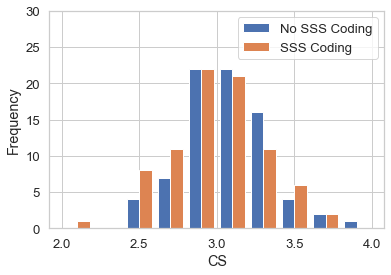

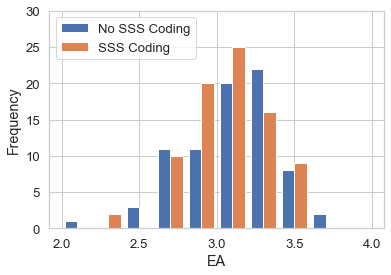

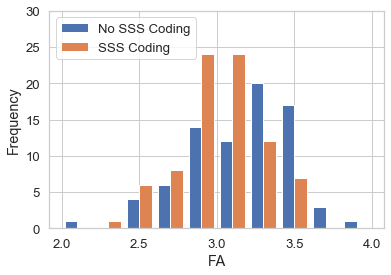

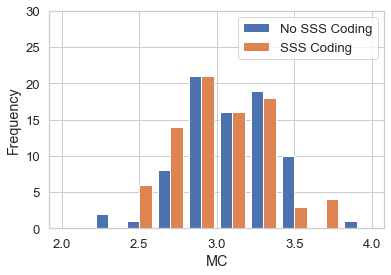

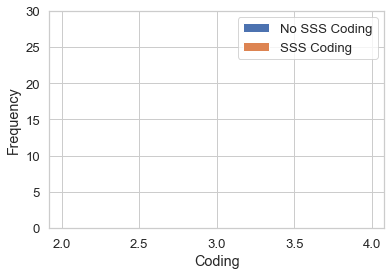

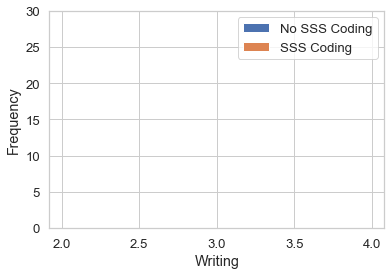

In [8]:
for dataColumn in list(data):
    plt.hist([(data[(data['Coding']==0)])[dataColumn],(data[(data['Coding']==1)])[dataColumn]], bins=10, range=[2,4], label=['No SSS Coding','SSS Coding'])
    plt.legend()
    plt.xlabel(dataColumn)
    plt.ylabel('Frequency')
    plt.ylim(top=30)
    plt.show()


# Artem's code for processing the excel

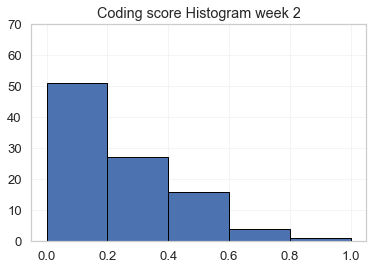

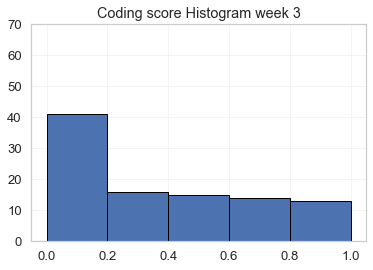

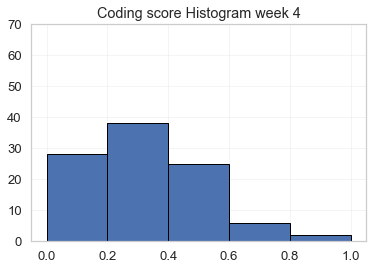

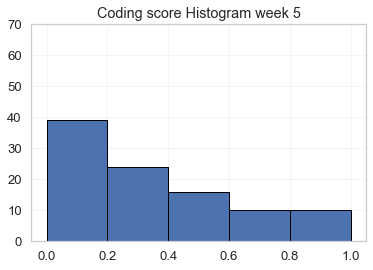

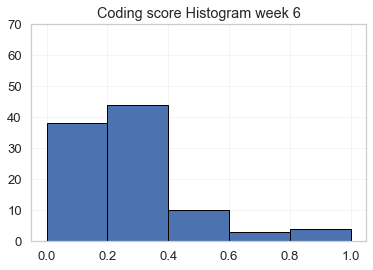

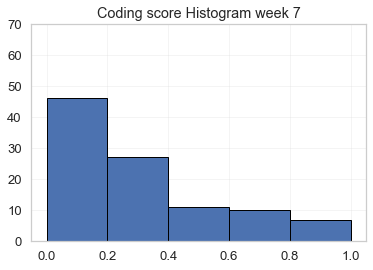

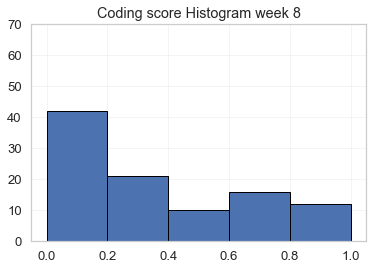

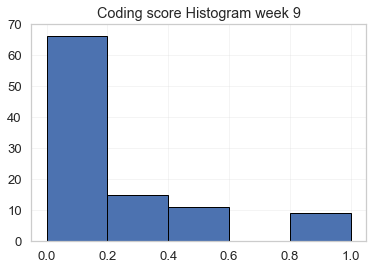

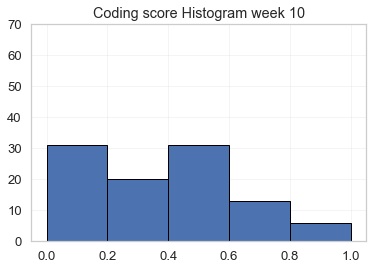

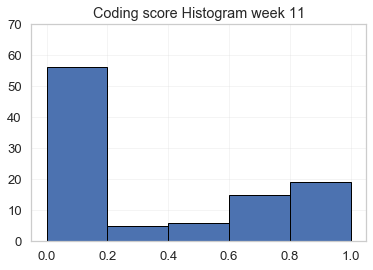

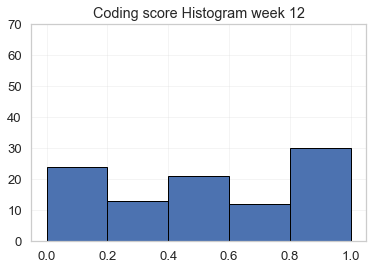

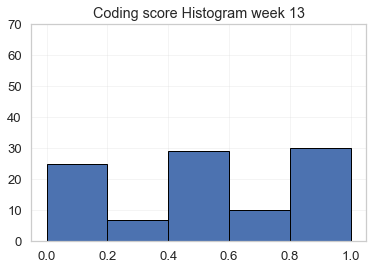

Done!


In [10]:
import pandas as pd
totals = [40, 28, 22, 23, 24, 23, 26, 22, 17, 6, 15, 10]
for i in range(2, 14):
    week_scores = []
    data = pd.read_excel('Fall2019_Coding_SSS_Attendance_Tracker.xlsx', sheet_name=i)
    data = data.fillna(0)
    week_scores.append(data.loc[:, "Total Score "])
    for x in range(len(week_scores)):
        week_scores[x] = week_scores[x]/totals[i-2]
        
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.savefig('Coding score Histogram week '+str(i), dpi=300, bbox_inches='tight')
    plt.show()
    
print('Done!')

# More Regression
How assignment weights that week, whether there is an assignment same day or not, and 'notebook difficulty' affects how many students will be absent that week

In [22]:
contextualData = pd.read_csv("Assignment Dates - CSV Export.csv")
contextualData = contextualData.dropna()
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence
0,0,0,55.714286,6.0
1,0,0,69.444444,5.0
2,6,1,71.000000,11.0
3,8,0,74.285714,10.0
4,9,1,63.571429,36.0
5,0,0,80.000000,15.0
6,0,0,54.166667,5.0
7,8,0,69.285714,9.0
8,8,1,90.000000,15.0
9,14,0,80.000000,13.0


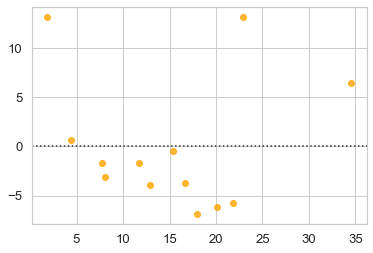

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Absence   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     5.071
Date:                Mon, 24 Feb 2020   Prob (F-statistic):             0.0251
Time:                        20:24:03   Log-Likelihood:                -42.794
No. Observations:                  13   AIC:                             93.59
Df Residuals:                       9   BIC:                             95.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2044     14.711      1.441      0.183     -12.075      54.484
Weight         1.0608      0.335      3.170      0.011       0.304       1.818
SameDay        7.5291      5.077      1.483      0.172      -3.955      19.013
Difficulty    -0.2422      0.210     -1.151      0.279      -0.718       0.234
==============================================================================
Omnibus:                        4.271   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.585
Skew:                           1.090   Prob(JB):                        0.275
Kurtosis:                       2.862   Cond. No.                         474.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

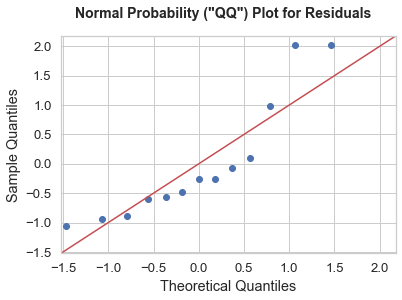

In [96]:
# Code edited from CS51 2.1 class cocalc, extra explanations added where needed
def mult_regression(column_x, column_y, _data):
    global regressionmodel
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''
    
    data = _data
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() 

    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='orange', label='Regression')
    residualplot.set_alpha(0.5)
    plt.show()

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    
mult_regression(['Weight','SameDay','Difficulty'],'Absence', contextualData)
regressionmodel.summary()

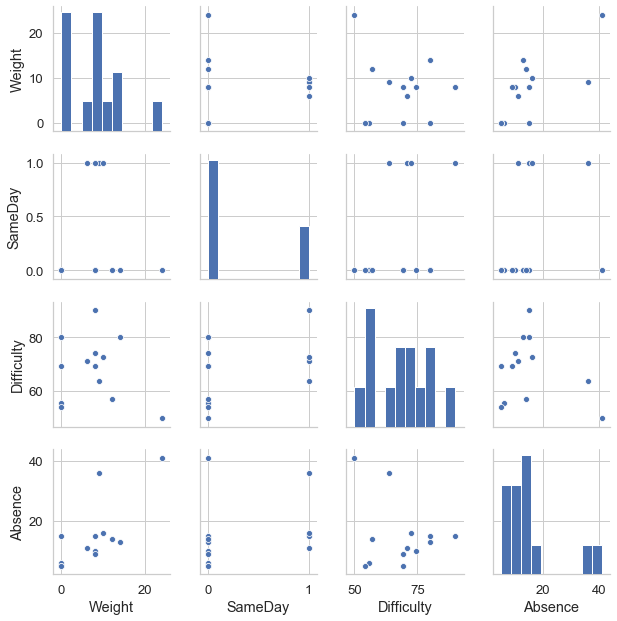

In [33]:
column_x = ['Weight','SameDay','Difficulty']
column_y = 'Absence'
columnstoplot = column_x + [column_y]

sns.pairplot(contextualData[columnstoplot], x_vars=columnstoplot, y_vars=columnstoplot, height=2.2);

# Even More Regression
How Notebook 'difficulty' correlates with average notebook scores

In [44]:
contextualData = pd.read_csv("Assignment Dates - CSV Export.csv")
contextualData = contextualData.dropna()
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence
0,0,0,55.714286,6.0
1,0,0,69.444444,5.0
2,6,1,71.000000,11.0
3,8,0,74.285714,10.0
4,9,1,63.571429,36.0
5,0,0,80.000000,15.0
6,0,0,54.166667,5.0
7,8,0,69.285714,9.0
8,8,1,90.000000,15.0
9,14,0,80.000000,13.0


In [12]:
import pandas as pd
totals = [10,15,6, 17,22,26,23,24,23,22,28,1,40,10]
averages = []
data = pd.read_csv('F19 Coding SSS Attendance Tracker.csv')
data = data.fillna(0)
data.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,9.0,9.0,0.0,7,0.0,0.0,5.0,8.0,13.0,7.0,11.0,0.0,0.0,0.0
1,7.0,11.0,0.0,6,9.0,18.0,19.0,10.0,19.0,9.0,8.0,0.0,23.0,5.0
2,7.0,5.0,0.0,2,0.0,2.0,4.0,7.0,3.0,7.0,5.0,0.0,9.0,0.0
3,6.0,0.0,0.0,1,1.0,1.0,2.0,0.0,2.0,2.0,5.0,0.0,0.0,5.0
4,8.0,15.0,0.0,5,9.0,2.0,4.0,4.0,0.0,5.0,13.0,0.0,10.0,4.0


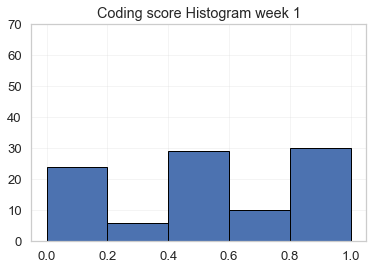

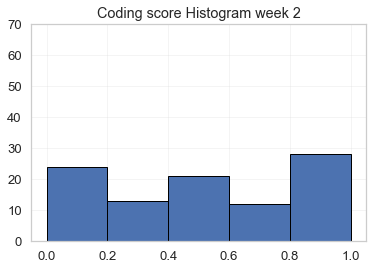

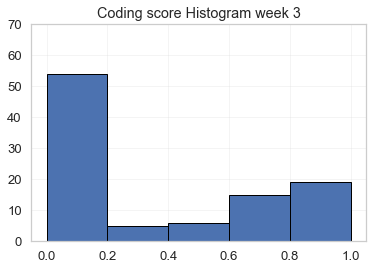

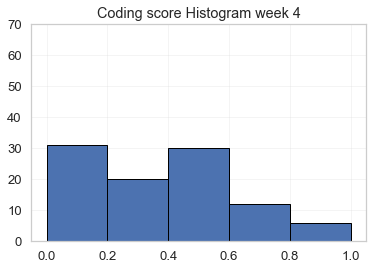

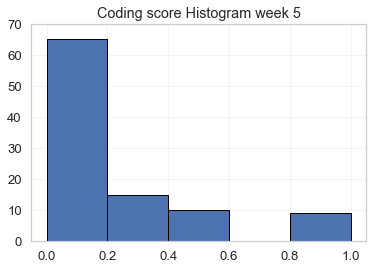

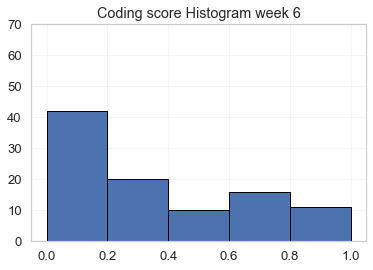

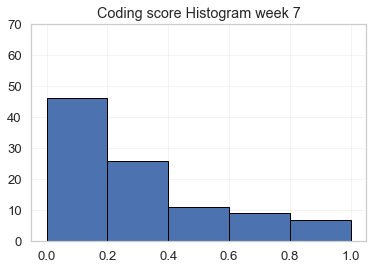

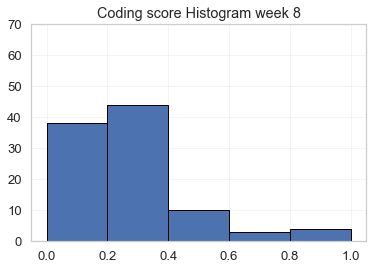

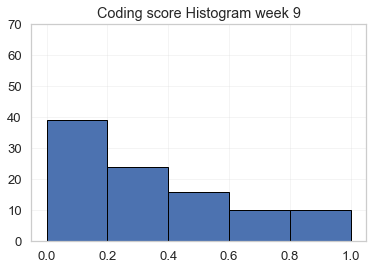

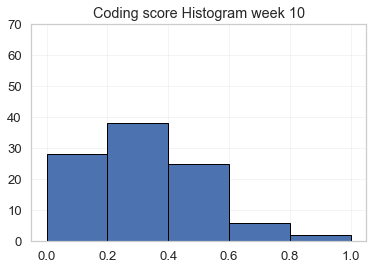

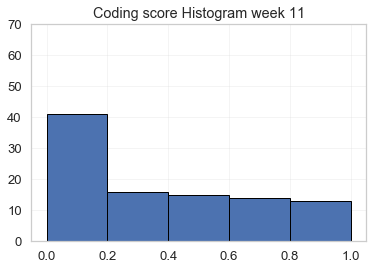

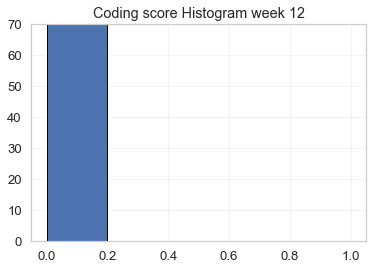

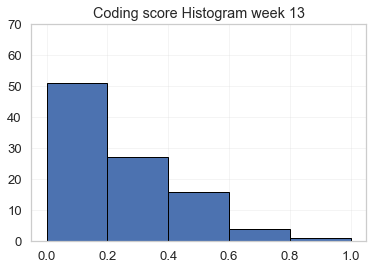

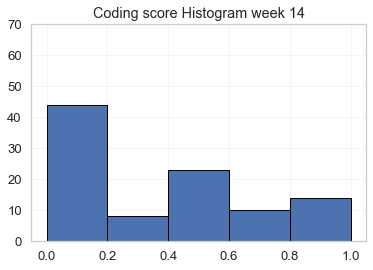

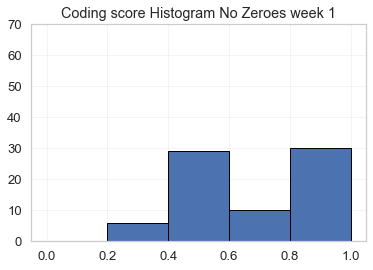

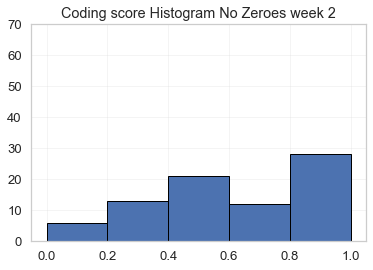

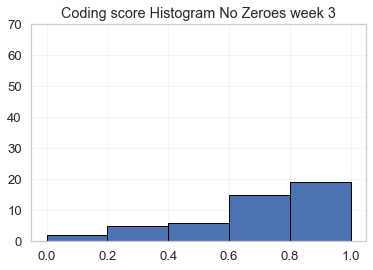

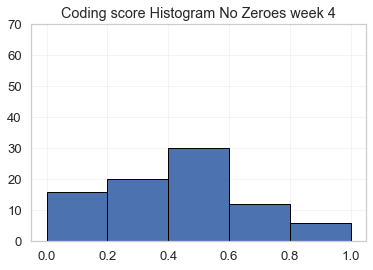

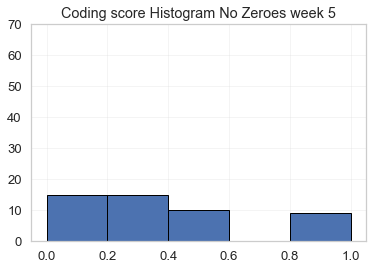

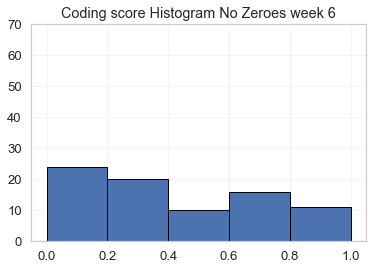

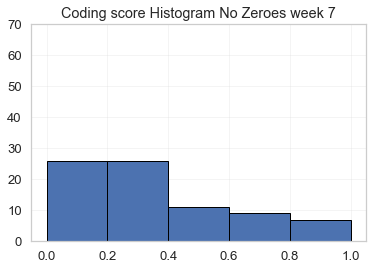

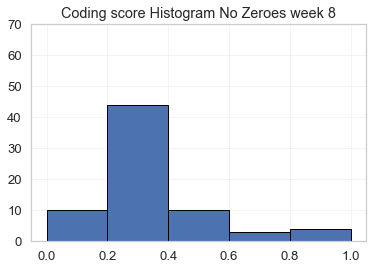

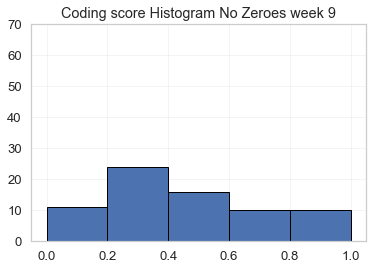

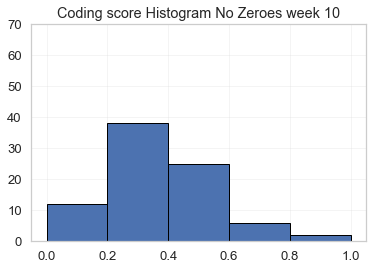

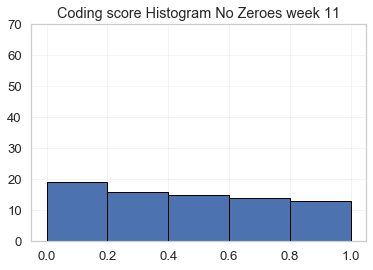

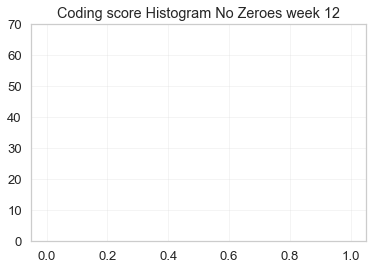

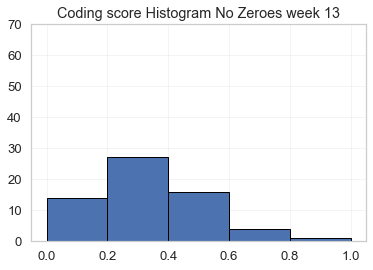

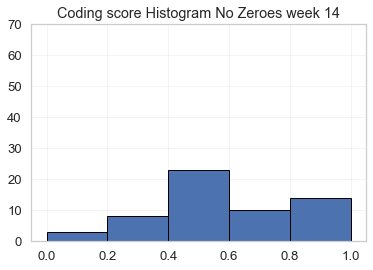

Done


In [14]:
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        #if i == 12:
        #    print(week_scores[x], totals[i], '=',week_scores[x]/totals[i])
        week_scores[x] = week_scores[x]/totals[i]
    
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.title('Coding score Histogram week '+str(i+1))
    plt.savefig('Coding score Histogram week '+str(i+1), dpi=300, bbox_inches='tight')
    plt.show()
    
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        #if i == 12:
        #    print(week_scores[x], totals[i], '=',week_scores[x]/totals[i])
        week_scores[x] = week_scores[x]/totals[i]
    
    week_scores = list(filter(lambda a: a != 0, week_scores))
    
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.title('Coding score Histogram No Zeroes week '+str(i+1))
    plt.savefig('Coding score Histogram No Zeroes week '+str(i+1), dpi=300, bbox_inches='tight')
    plt.show()
    
print('Done')

In [90]:
averages = []
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        week_scores[x] = week_scores[x]/totals[i]
    if i == 11:
        continue
    week_scores = list(filter(lambda a: a != 0, week_scores))
    averages.append(sum(week_scores)/len(week_scores))

In [91]:
len(averages)

13

In [92]:
contextualData['Averages'] = averages

In [93]:
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence,Averages
0,0,0,55.714286,6.0,0.650667
1,0,0,69.444444,5.0,0.633333
2,6,1,71.000000,11.0,0.684397
3,8,0,74.285714,10.0,0.432773
4,9,1,63.571429,36.0,0.383581
5,0,0,80.000000,15.0,0.432099
6,0,0,54.166667,5.0,0.369290
7,8,0,69.285714,9.0,0.340376
8,8,1,90.000000,15.0,0.465524
9,14,0,80.000000,13.0,0.372809


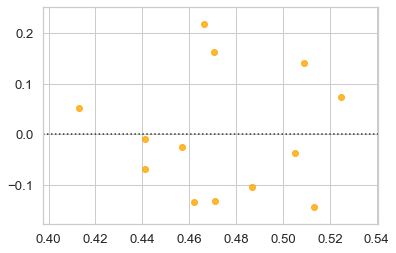

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Averages   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8123
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.387
Time:                        20:25:07   Log-Likelihood:                 9.5545
No. Observations:                  13   AIC:                            -15.11
Df Residuals:                      11   BIC:                            -13.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6648      0.215      3.097      0.010       0.192       1.137
Difficulty    -0.0014      0.002     -0.901      0.387      -0.005       0.002
Difficulty    -0.0014      0.002     -0.901      0.387      -0.005       0.002
==============================================================================
Omnibus:                        1.474   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.039
Skew:                           0.447   Prob(JB):                        0.595
Kurtosis:                       1.942   Cond. No.                     3.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

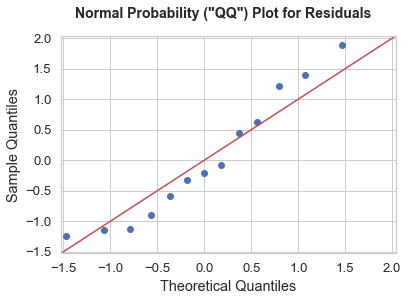

In [100]:
mult_regression(['Difficulty','Difficulty'],'Averages', contextualData)
regressionmodel.summary()

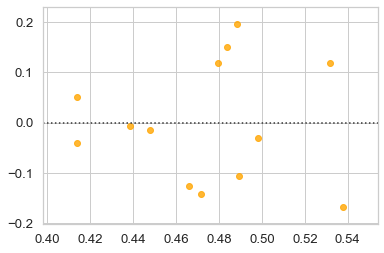

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Averages   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.358
Method:                 Least Squares   F-statistic:                    0.2084
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.927
Time:                        20:32:26   Log-Likelihood:                 9.7358
No. Observations:                  13   AIC:                            -9.472
Df Residuals:                       8   BIC:                            -6.647
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7335      0.304      2.409      0.043       0.032       1.435
Weight        -0.0019      0.009     -0.205      0.843      -0.023       0.019
SameDay        0.0258      0.106      0.245      0.813      -0.218       0.269
Difficulty    -0.0035      0.004     -0.842      0.424      -0.013       0.006
Absence       -0.0008      0.006     -0.126      0.903      -0.015       0.014
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                0.867
Skew:                           0.178   Prob(JB):                        0.648
Kurtosis:                       1.786   Cond. No.                         541.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

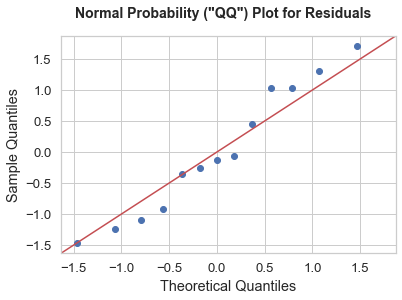

In [103]:
mult_regression(['Weight','SameDay','Difficulty','Absence'],'Averages', contextualData)
regressionmodel.summary()